<a href="https://colab.research.google.com/github/mircii/MILO/blob/main/01_Source/03_Saved_Models/MILO_Licenta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>MILO</h1>**

#**Release v1.0.0**

Content:
- Machine Learning Model
- Conversational NLP
- Trained on https://www.kaggle.com/datasets/kreeshrajani/3k-conversations-dataset-for-chatbot translated in Romanian
- Sequential Model summary:

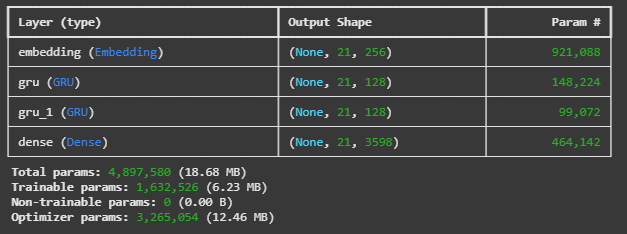
- Accuracy ~69%
- Loss ~2.59
- Translation script(from CVS eng to JSON ro)

## Translating to romanian and converting the dataset to .json

In [ ]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=a74c262fc821d9b686f71b0441f6236d3a5e4ded850c9650905e82323e6d6214
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfra

In [ ]:
import pandas as pd
from googletrans import Translator
import json
import time  # To add a delay between requests
import random  # To introduce variability in delays

# Load the dataset
df = pd.read_csv('Conversation.csv')

# Initialize the translator
translator = Translator()

# Function to translate text
def translate_text(text, target_language="ro"):
    if not text:  # Check if the text is empty or None
        return ""  # Return empty string if there's no text to translate

    try:
        translated = translator.translate(text, src='en', dest=target_language)
        return translated.text
    except Exception as e:
        print(f"Error during translation: {e}")
        return ""  # Return empty string in case of error

# Create a list to store the translated conversations
translated_conversations = []

# Loop through each row in the dataframe
for index, row in df.iterrows():
    # Extracting question and answer
    question = row.get('question', '')
    answer = row.get('answer', '')

    # Translate the question and answer
    question_ro = translate_text(question, 'ro')
    answer_ro = translate_text(answer, 'ro')

    # Add the translated conversation to the list
    translated_conversations.append({
        "question_ro": question_ro,
        "answer_ro": answer_ro
    })


# Save the translated conversations to a JSON file
with open('Conversation_romanian.json', 'w', encoding='utf-8') as f:
    json.dump(translated_conversations, f, ensure_ascii=False, indent=4)

print("Translated conversations have been saved to 'Conversation_romanian.json'")


Error during translation: the JSON object must be str, bytes or bytearray, not NoneType
Error during translation: the JSON object must be str, bytes or bytearray, not NoneType
Error during translation: the JSON object must be str, bytes or bytearray, not NoneType
Error during translation: the JSON object must be str, bytes or bytearray, not NoneType
Error during translation: The read operation timed out
Error during translation: the JSON object must be str, bytes or bytearray, not NoneType
Translated conversations have been saved to 'Conversation_romanian.json'


## Preprocessing the data.

In [ ]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Extracting the questions and answers
with open('Conversation_romanian.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

questions = [item['question_ro'] for item in data]
answers = [item['answer_ro'] for item in data]

In [ ]:
# Visualizing the first 10 questions and answers

print("First 10 questions:", questions[:10])
print("First 10 answers:", answers[:10])

First 10 questions: ['Bună, ce mai faci?', 'Sunt bine.Ce zici de tine?', 'Sunt destul de bun.Mulțumesc că ai întrebat.', 'nici o problemă.Deci, cum ai fost?', 'Am fost grozav.şi tu?', 'Am fost bun.Sunt la școală chiar acum.', 'La ce școală mergi?', 'Merg la PCC.', 'Îți place acolo?', 'e în regulă.Este un campus cu adevărat mare.']
First 10 answers: ['Sunt bine.Ce zici de tine?', 'Sunt destul de bun.Mulțumesc că ai întrebat.', 'nici o problemă.Deci, cum ai fost?', 'Am fost grozav.şi tu?', 'Am fost bun.Sunt la școală chiar acum.', 'La ce școală mergi?', 'Merg la PCC.', 'Îți place acolo?', 'e în regulă.Este un campus cu adevărat mare.', 'Noroc cu școala.']


## Tokenization.

In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>')

# Fit the tokenizer on both questions and answers
tokenizer.fit_on_texts(questions + answers)

VOCAB_SIZE = len(tokenizer.word_index) + 1  # +1 to include padding/OOV token

# Convert text to sequences
question_sequences = tokenizer.texts_to_sequences(questions)
answer_sequences = tokenizer.texts_to_sequences(answers)

word_index = tokenizer.word_index

In [ ]:
# Visualizing the vocabulary
print(f"Vocabulary Size: {VOCAB_SIZE}")
print("First 10 words in vocabulary:", list(word_index.items())[:10])

Vocabulary Size: 3598
First 10 words in vocabulary: [('<OOV>', 1), ('de', 2), ('nu', 3), ('să', 4), ('o', 5), ('este', 6), ('a', 7), ('ce', 8), ('că', 9), ('am', 10)]


## Padding the sequences.

In [ ]:
MAX_sequence_length = max(len(seq) for seq in question_sequences + answer_sequences)

question_padded = pad_sequences(question_sequences, maxlen=MAX_sequence_length, padding='post')
answer_padded = pad_sequences(answer_sequences, maxlen=MAX_sequence_length, padding='post')

In [ ]:
# Visualizing the padding

print("First padded question sequence:", question_padded[0])
print("First padded answer sequence:", answer_padded[0])

First padded question sequence: [95  8 21 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
First padded answer sequence: [ 19  20   8 229   2  67   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]


## Training & Testing Sets.

In [ ]:
# Using train test spilt in oreder to create the sets
q_train, q_test, a_train, a_test = train_test_split(question_padded, answer_padded, test_size=0.2, random_state=42)

In [ ]:
# Visualizing the train & test sets shapres and lengths
print("Training questions shape:", q_train.shape)
print("Training answers shape:", a_train.shape)
print("Testing questions shape:", q_test.shape)
print("Testing answers shape:", a_test.shape)

print("Length of training questions:", len(q_train))
print("Length of training answers:", len(a_train))
print("Length of testing questions:", len(q_test))
print("Length of testing answers:", len(a_test))

Training questions shape: (2980, 21)
Training answers shape: (2980, 21)
Testing questions shape: (745, 21)
Testing answers shape: (745, 21)
Length of training questions: 2980
Length of training answers: 2980
Length of testing questions: 745
Length of testing answers: 745


## Building the Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Defining some Hyperparameters
EMBEDDING_DIM = 256
GRU_UNITS = 128
EPOCHS = 10
BATCH_SIZE = 64

MILO_01 = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM),
    tf.keras.layers.GRU(GRU_UNITS, return_sequences=True),
    tf.keras.layers.GRU(GRU_UNITS, return_sequences=True),
    tf.keras.layers.Dense(VOCAB_SIZE)
])

MILO_01.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.05, patience=1, restore_best_weights=True)

MILO_01.fit(q_train, a_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(q_test, a_test))

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 554ms/step - accuracy: 0.6289 - loss: 3.9717 - val_accuracy: 0.6877 - val_loss: 2.3644
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 480ms/step - accuracy: 0.6913 - loss: 2.2690 - val_accuracy: 0.6913 - val_loss: 2.3545
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 452ms/step - accuracy: 0.6943 - loss: 2.2044 - val_accuracy: 0.6917 - val_loss: 2.4024
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 443ms/step - accuracy: 0.6954 - loss: 2.1312 - val_accuracy: 0.6921 - val_loss: 2.3905
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 499ms/step - accuracy: 0.6949 - loss: 2.1091 - val_accuracy: 0.6904 - val_loss: 2.4131
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 452ms/step - accuracy: 0.6944 - loss: 2.0890 - val_accuracy: 0.6906 - val_loss: 2.4540
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 465ms/step - accuracy: 0.6985 - loss: 2.0379 - val_accuracy: 0.6883 - val_loss: 2.4727
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 431ms/step - accuracy: 0.6984 - loss: 2.0222 - val_accu

In [ ]:
MILO_01.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 21, 256)             │         921,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 21, 128)             │         148,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 21, 128)             │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 21, 3598)            │         464,142 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,897,580 (18.68 MB)

 Trainable params: 1,632,526 (6.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,265,054 (12.46 MB)

## Saving the model

In [ ]:
MILO_01.save('MILO_01.keras')

In [ ]:
# Download the saved model
from google.colab import files
files.download('MILO_01.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Making predictions

In [ ]:
def chatbot_response(user_input):
  input_sequence = tokenizer.texts_to_sequences([user_input])
  padded_sequence = pad_sequences(input_sequence, maxlen=MAX_sequence_length, padding='post')
  predicted_sequence = MILO_01.predict(padded_sequence)
  response_text = decode_response(predicted_sequence)
  return response_text

def decode_response(predicted_sequence):
  predicted_indices = np.argmax(predicted_sequence, axis=-1)
  response_words = [tokenizer.index_word.get(idx, '') for idx in predicted_indices[0]]
  return ' '.join(response_words)

while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break
    response = chatbot_response(user_input)
    print("MILO_01:", response)


KeyboardInterrupt: Interrupted by user

# Release v1.1.0

Content:

- Trained on conversation_intents_ro.json which is generated using GPT-4o mini and has an intent based structure for better training
- Sequential model summary:
- Accuracy
- Loss

## Preporcesing the data

In [4]:
import random
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from ast import pattern

# Extracting the questions and answers
with open('conversation_intents_ro.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

patterns = []
responses = []
tags = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        responses.append(random.choice(intent['responses']))
        tags.append(intent['tag'])

In [ ]:
# Visualizing the first 10 questions and answers
print("First 5 patterns:", patterns[:5])
print("First 5 responses:", responses[:5])
print("First 5 tags:", tags[:5])

First 5 patterns: ['Salut', 'Bună', 'Hei', 'Bună dimineața', 'Bună seara']
First 5 responses: ['Salut! Cum îți pot fi de ajutor?', 'Mă bucur că te văd! Ce pot face pentru tine?', 'Bună! Cum te pot ajuta?', 'Bună! Cum te pot ajuta?', 'Salut! Cu ce te pot ajuta?']
First 5 tags: ['greeting', 'greeting', 'greeting', 'greeting', 'greeting']


## Tokenization

In [5]:
from sklearn.preprocessing import LabelEncoder
VOCAB_SIZE = 5000
MAX_sequence_length = 20

tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token = "<OOV>")

# Fit the tokenizer on patterns and responses
tokenizer.fit_on_texts(patterns + responses)

# Creating features and labels while converting to sequences
X = tokenizer.texts_to_sequences(patterns)
X = pad_sequences(X, maxlen=MAX_sequence_length, padding='post', truncating='post')

y = tokenizer.texts_to_sequences(responses)
y = pad_sequences(y, maxlen=MAX_sequence_length, padding='post', truncating='post')

# Convert the tags to integers
label_encoder = LabelEncoder()
y_tags = label_encoder.fit_transform(tags)

In [ ]:
# Print out some tokenized data for verification
print(f"Example pattern tokenized: {X[0]}")
print(f"Encoded tag for the first pattern: {y_tags[0]}")
print(f"Example response tokenized: {y[0]}")

Example pattern tokenized: [11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
Encoded tag for the first pattern: 3
Example response tokenized: [11  4 26  7 64  8 43  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [6]:
word_index = tokenizer.word_index

tag_index = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(f"Vocabulary Size: {VOCAB_SIZE}")
print("First 10 words in vocabulary:", list(word_index.items())[:10])

print("Tags and tag encodings:", tag_index)

Vocabulary Size: 5000
First 10 words in vocabulary: [('<OOV>', 1), ('ce', 2), ('să', 3), ('cum', 4), ('te', 5), ('de', 6), ('pot', 7), ('bună', 8), ('ai', 9), ('o', 10)]
Tags and tag encodings: {np.str_('advice'): np.int64(0), np.str_('career_advice'): np.int64(1), np.str_('goodbye'): np.int64(2), np.str_('greeting'): np.int64(3), np.str_('help'): np.int64(4), np.str_('small_talk'): np.int64(5)}


## Training & Testing Sets.

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If using intent classification
y_train_tags, y_test_tags = train_test_split(y_tags, test_size=0.2, random_state=42)

print(f"Training patterns shape: {X_train.shape}")
print(f"Training responses shape: {y_train.shape}")
print(f"Training tags shape: {y_train_tags.shape}")


Training patterns shape: (37, 20)
Training responses shape: (37, 20)
Training tags shape: (37,)


## Building the model MILO_02

In [8]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Attention, Input, Bidirectional
from tensorflow.keras.models import Model

# Defining hyperparameters

EMBEDDING_DIM = 32
LSTM_UNITS = 32

# Define the input and output sequences
encoder_inputs = Input(shape=(None,))
decoder_inputs = Input(shape=(None,))

# Define the embedding layer
embedding_layer = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM)

# Define the encoder LSTM layer
encoder_lstm = LSTM(units=LSTM_UNITS, return_state=True)

# Process the input sequence with the encoder LSTM layer
encoder_embeddings = embedding_layer(encoder_inputs)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embeddings)
encoder_states = [state_h, state_c]

# Define the decoder LSTM layer

decoder_lstm = LSTM(units=LSTM_UNITS, return_sequences=True, return_state=True)

# Process the output sequence with the decoder LSTM layer
decoder_embeddings = embedding_layer(decoder_inputs)
decoder_outputs, _, _ = decoder_lstm(decoder_embeddings, initial_state=encoder_states)

# Define the output layer
output_layer = Dense(units=VOCAB_SIZE, activation='softmax')

# Generate the output sequence using the output layer
decoder_outputs = output_layer(decoder_outputs)

# Create the Model
MILO_02 = Model([encoder_inputs, decoder_inputs], decoder_outputs)
MILO_02.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
MILO_02.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, None, 32)       │        160,000 │ input_layer[0][0],     │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 32), (None,    │          8,320 │ embedding[0][0]        │
│                           │ 32), (None, 32)]       │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 32),     │          8,320 │ embedding[1][0],       │
│                           │ (None, 32), (None,     │                │ lstm[0][1], lstm[0][2] │
│                           │ 32)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 5000)     │        165,000 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 341,640 (1.30 MB)

 Trainable params: 341,640 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

## Fitting the model

In [ ]:
X_train.shape, y_train.shape

((37, 20), (37, 20))

In [10]:
EPOCHS = 17
BATCH_SIZE = 16

history = MILO_02.fit(
    [X_train, y_train],
    y_train,
    validation_data=([X_test, y_test[:, :-1]], y_test[:, 1:]),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6445 - loss: 5.5687 - val_accuracy: 0.6842 - val_loss: 5.5952
Epoch 2/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6523 - loss: 5.3230 - val_accuracy: 0.6842 - val_loss: 5.3826
Epoch 3/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6667 - loss: 5.0690 - val_accuracy: 0.6842 - val_loss: 5.1815
Epoch 4/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6456 - loss: 4.8830 - val_accuracy: 0.6842 - val_loss: 4.9932
Epoch 5/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6484 - loss: 4.6597 - val_accuracy: 0.6842 - val_loss: 4.8161
Epoch 6/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6433 - loss: 4.4832 - val_accuracy: 0.6842 - val_loss: 4.6483
Epoch 7/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6499 - loss: 4.2927 - val_accuracy: 0.6842 - val_loss: 4.4902
Epoch 8/17
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6460 - loss: 4.1181 - val_accuracy: 0.6842 - val_loss: 4.3415


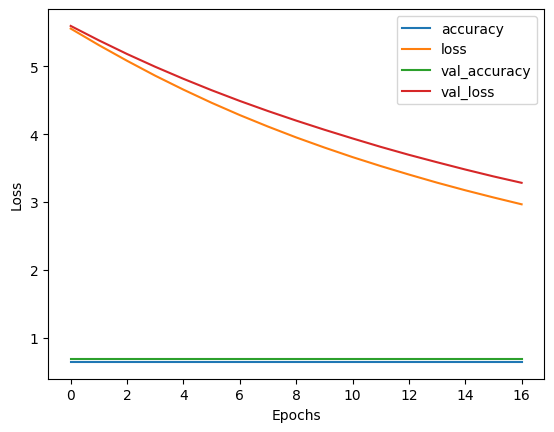

In [11]:
from matplotlib import pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [15]:
MILO_02.save("MILO_02.h5")

In [17]:
from tensorflow.keras.models import load_model

# Load the trained model
MILO_02 = load_model("MILO_02.h5")


## Making predictions

In [18]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_intent(user_input, tokenizer, model, label_encoder, max_sequence_length=MAX_sequence_length):
    """
    Predicts the intent of the user's input.
    """
    # Convert the user's input into a sequence of tokens
    user_input_seq = tokenizer.texts_to_sequences([user_input])

    # Pad the sequence to ensure it matches the expected input length for the model
    user_input_seq = pad_sequences(user_input_seq, maxlen=max_sequence_length, padding='post', truncating='post')

    # Create a dummy input for the decoder (all zeros)
    dummy_decoder_input = np.zeros((1, max_sequence_length), dtype=np.int32)

    # Get the model's prediction (output logits)
    # Pass both the encoder input and the dummy decoder input
    pred = model.predict([user_input_seq, dummy_decoder_input])

    # Convert the prediction into an index of the tag
    # pred_index = np.argmax(pred, axis=1) # Original line causing the error
    # Extract the index of the maximum probability for the first (and only) timestep
    # Then, flatten the result to a 1D array
    pred_index = np.argmax(pred[0][0])
    pred_index = np.array([pred_index]) # Convert to a 1D array


    # Decode the tag index to get the tag
    predicted_tag = label_encoder.inverse_transform(pred_index)

    return predicted_tag[0]

def generate_response(predicted_tag, intents):
    """
    Generate a response based on the predicted intent tag.
    """
    # Loop through all intents and find the matching tag
    for intent in intents:
        if intent['tag'] == predicted_tag:
            # Choose a random response from the list of responses for that tag
            response = np.random.choice(intent['responses'])
            return response
    return "Îmi pare rău, nu am înțeles. Poți reformula?"

In [20]:
intents = data['intents']

while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break
    predicted_tag = predict_intent(user_input, tokenizer, MILO_02, label_encoder)
    response = generate_response(predicted_tag, intents)
    print(f"Predicted Tag: {predicted_tag}")
    print("\nMILO_02:", response, "\n")

You: Salut!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Tag: advice

MILO_02: Consistența și învățarea din eșecuri sunt cheia succesului! 

You: ciao
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Tag: advice

MILO_02: Consistența și învățarea din eșecuri sunt cheia succesului! 

You: ce faci?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Tag: advice

MILO_02: Începe cu pași mici și rămâi constant! 

You: exit
